In [1]:
import pandas as pd 
from scipy import stats 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('../data/data_clean.csv') 
# df = pd.read_sas('data/demographics.xpt', format='xport', index=None, encoding='ISO-8859-1', chunksize=None, iterator=False)
df.head()

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH1,RIDRETH3,DMDCITZN,DMDEDUC2,MIALANG,DMDHHSIZ,INDHHIN2,...,HIQ011,PAQ635,PAQ650,PAQ665,PAD680,PAQ706,PAQ710,LBXTC,highLDL,bmi
0,73557,69,1,4,4,1.0,3.0,1.0,3,4.0,...,1,2,2,2,600.0,NaN,2.0,167.0,NaN,26.683761
1,73558,54,1,3,3,1.0,3.0,1.0,4,7.0,...,2,2,2,2,540.0,NaN,4.0,170.0,NaN,28.632450
2,73559,72,1,3,3,1.0,4.0,1.0,2,10.0,...,1,2,2,1,300.0,NaN,4.0,126.0,0.0,28.929300
3,73561,73,2,3,3,1.0,5.0,1.0,2,15.0,...,1,2,2,2,480.0,NaN,1.0,201.0,0.0,19.716567
4,73562,56,1,1,1,1.0,4.0,1.0,1,9.0,...,1,2,2,2,360.0,NaN,5.0,226.0,NaN,41.690341


In [3]:
df.columns 

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'RIDRETH3', 'DMDCITZN',
       'DMDEDUC2', 'MIALANG', 'DMDHHSIZ', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR',
       'BMXWT', 'BMXHT', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST',
       'BMDAVSAD', 'BPXPLS', 'BPXPULS', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2',
       'CDQ001', 'CDQ010', 'DIQ010', 'DIQ160', 'DIQ170', 'DIQ172', 'DIQ180',
       'DIQ050', 'DIQ070', 'DBQ095Z', 'DBD100', 'DRQSPREP', 'DR1STY',
       'DRQSDIET', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE',
       'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TSODI',
       'DR1TALCO', 'DR1_320Z', 'LBDHDD', 'HIQ011', 'PAQ635', 'PAQ650',
       'PAQ665', 'PAD680', 'PAQ706', 'PAQ710', 'LBXTC', 'LBXTR'],
      dtype='object')

In [4]:
df.shape

(5769, 62)

In [5]:
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH1,RIDRETH3,DMDCITZN,DMDEDUC2,MIALANG,DMDHHSIZ,INDHHIN2,...,LBDHDD,HIQ011,PAQ635,PAQ650,PAQ665,PAD680,PAQ706,PAQ710,LBXTC,LBXTR
count,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5759.000000,5762.000000,5146.000000,5769.000000,5493.000000,...,5342.000000,5769.000000,5769.000000,5769.000000,5769.000000,5764.000000,0.0,5766.000000,5342.000000,2553.000000
mean,78673.297105,49.111111,1.521928,3.143006,3.320333,1.130231,3.512843,1.075204,3.249090,8.649736,...,52.811681,1.219102,1.753337,1.781245,1.589704,454.806384,NaN,2.647763,189.131973,120.858598
std,2920.958598,17.563200,0.499562,1.178799,1.501965,0.336587,1.224465,0.263746,1.697629,4.454555,...,16.137959,0.469429,0.431106,0.413438,0.491930,604.770937,NaN,1.819410,41.857324,124.672596
min,73557.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,0.000000,69.000000,14.000000
25%,76170.000000,34.000000,1.000000,3.000000,3.000000,1.000000,3.000000,1.000000,2.000000,5.000000,...,41.000000,1.000000,2.000000,2.000000,1.000000,240.000000,NaN,1.000000,161.000000,65.000000
50%,78716.000000,48.000000,2.000000,3.000000,3.000000,1.000000,4.000000,1.000000,3.000000,8.000000,...,50.000000,1.000000,2.000000,2.000000,2.000000,420.000000,NaN,2.000000,186.000000,95.000000
75%,81170.000000,63.000000,2.000000,4.000000,4.000000,1.000000,5.000000,1.000000,4.000000,14.000000,...,61.750000,1.000000,2.000000,2.000000,2.000000,540.000000,NaN,4.000000,213.000000,144.000000
max,83729.000000,80.000000,2.000000,5.000000,7.000000,2.000000,5.000000,2.000000,7.000000,15.000000,...,173.000000,9.000000,2.000000,2.000000,2.000000,9999.000000,NaN,8.000000,813.000000,4233.000000


In [6]:
# Number of NaN in each feature 
df.isnull().sum()

SEQN           0
RIDAGEYR       0
RIAGENDR       0
RIDRETH1       0
RIDRETH3       0
            ... 
PAD680         5
PAQ706      5769
PAQ710         3
LBXTC        427
LBXTR       3216
Length: 62, dtype: int64

In [7]:
# Number of NaN in each data point (person) 
df.T.isnull().sum() 

0        6
1        6
2        5
3        5
4        3
        ..
5764     8
5765     4
5766    30
5767     7
5768     5
Length: 5769, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 62 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5769 non-null   int64  
 1   RIDAGEYR  5769 non-null   int64  
 2   RIAGENDR  5769 non-null   int64  
 3   RIDRETH1  5769 non-null   int64  
 4   RIDRETH3  5769 non-null   int64  
 5   DMDCITZN  5759 non-null   float64
 6   DMDEDUC2  5762 non-null   float64
 7   MIALANG   5146 non-null   float64
 8   DMDHHSIZ  5769 non-null   int64  
 9   INDHHIN2  5493 non-null   float64
 10  INDFMIN2  5504 non-null   float64
 11  INDFMPIR  5314 non-null   float64
 12  BMXWT     5533 non-null   float64
 13  BMXHT     5530 non-null   float64
 14  BMXLEG    5265 non-null   float64
 15  BMXARML   5325 non-null   float64
 16  BMXARMC   5328 non-null   float64
 17  BMXWAIST  5270 non-null   float64
 18  BMDAVSAD  5099 non-null   float64
 19  BPXPLS    5404 non-null   float64
 20  BPXPULS   5405 non-null   floa

In [9]:
for col in df.columns: 
    print(col, '\t Number of Unique elements = ', df[col].nunique()) 
#     print(df[col].unique()) 
#     print() 

SEQN 	 Number of Unique elements =  5769
RIDAGEYR 	 Number of Unique elements =  61
RIAGENDR 	 Number of Unique elements =  2
RIDRETH1 	 Number of Unique elements =  5
RIDRETH3 	 Number of Unique elements =  6
DMDCITZN 	 Number of Unique elements =  2
DMDEDUC2 	 Number of Unique elements =  5
MIALANG 	 Number of Unique elements =  2
DMDHHSIZ 	 Number of Unique elements =  7
INDHHIN2 	 Number of Unique elements =  14
INDFMIN2 	 Number of Unique elements =  14
INDFMPIR 	 Number of Unique elements =  422
BMXWT 	 Number of Unique elements =  989
BMXHT 	 Number of Unique elements =  524
BMXLEG 	 Number of Unique elements =  229
BMXARML 	 Number of Unique elements =  170
BMXARMC 	 Number of Unique elements =  313
BMXWAIST 	 Number of Unique elements =  801
BMDAVSAD 	 Number of Unique elements =  240
BPXPLS 	 Number of Unique elements =  44
BPXPULS 	 Number of Unique elements =  2
BPXSY1 	 Number of Unique elements =  68
BPXDI1 	 Number of Unique elements =  52
BPXSY2 	 Number of Unique eleme

In [10]:
# stats.zscore(df, nan_policy='omit').describe()
# df[(np.abs(stats.zscore(df, nan_policy='omit')) < 3).all(axis=1)]

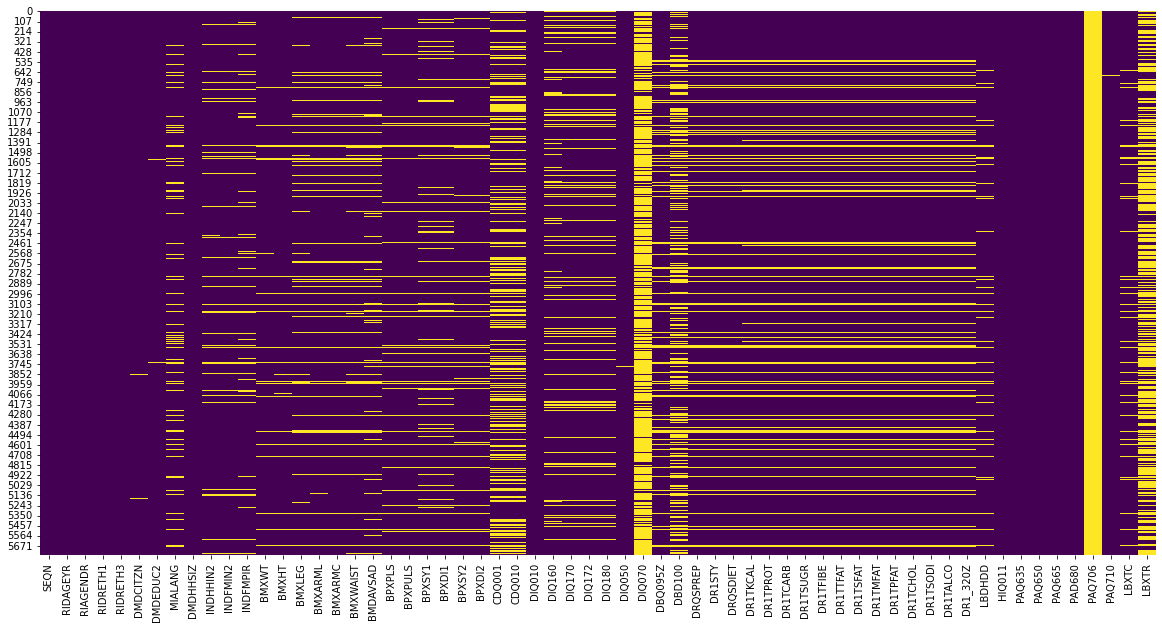

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis') 

plt.savefig('plots/missing_values.png')



In [12]:
# # Test for filling null values with means of columns 
# for col in df.columns: 
#     df[col].fillna(df[col].mean(), inplace=True)

/var/folders/ym/cbjytkk9003cvlgbkbrm77_80000gn/T/ipykernel_10317/2136164773.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation_df.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


<AxesSubplot:>

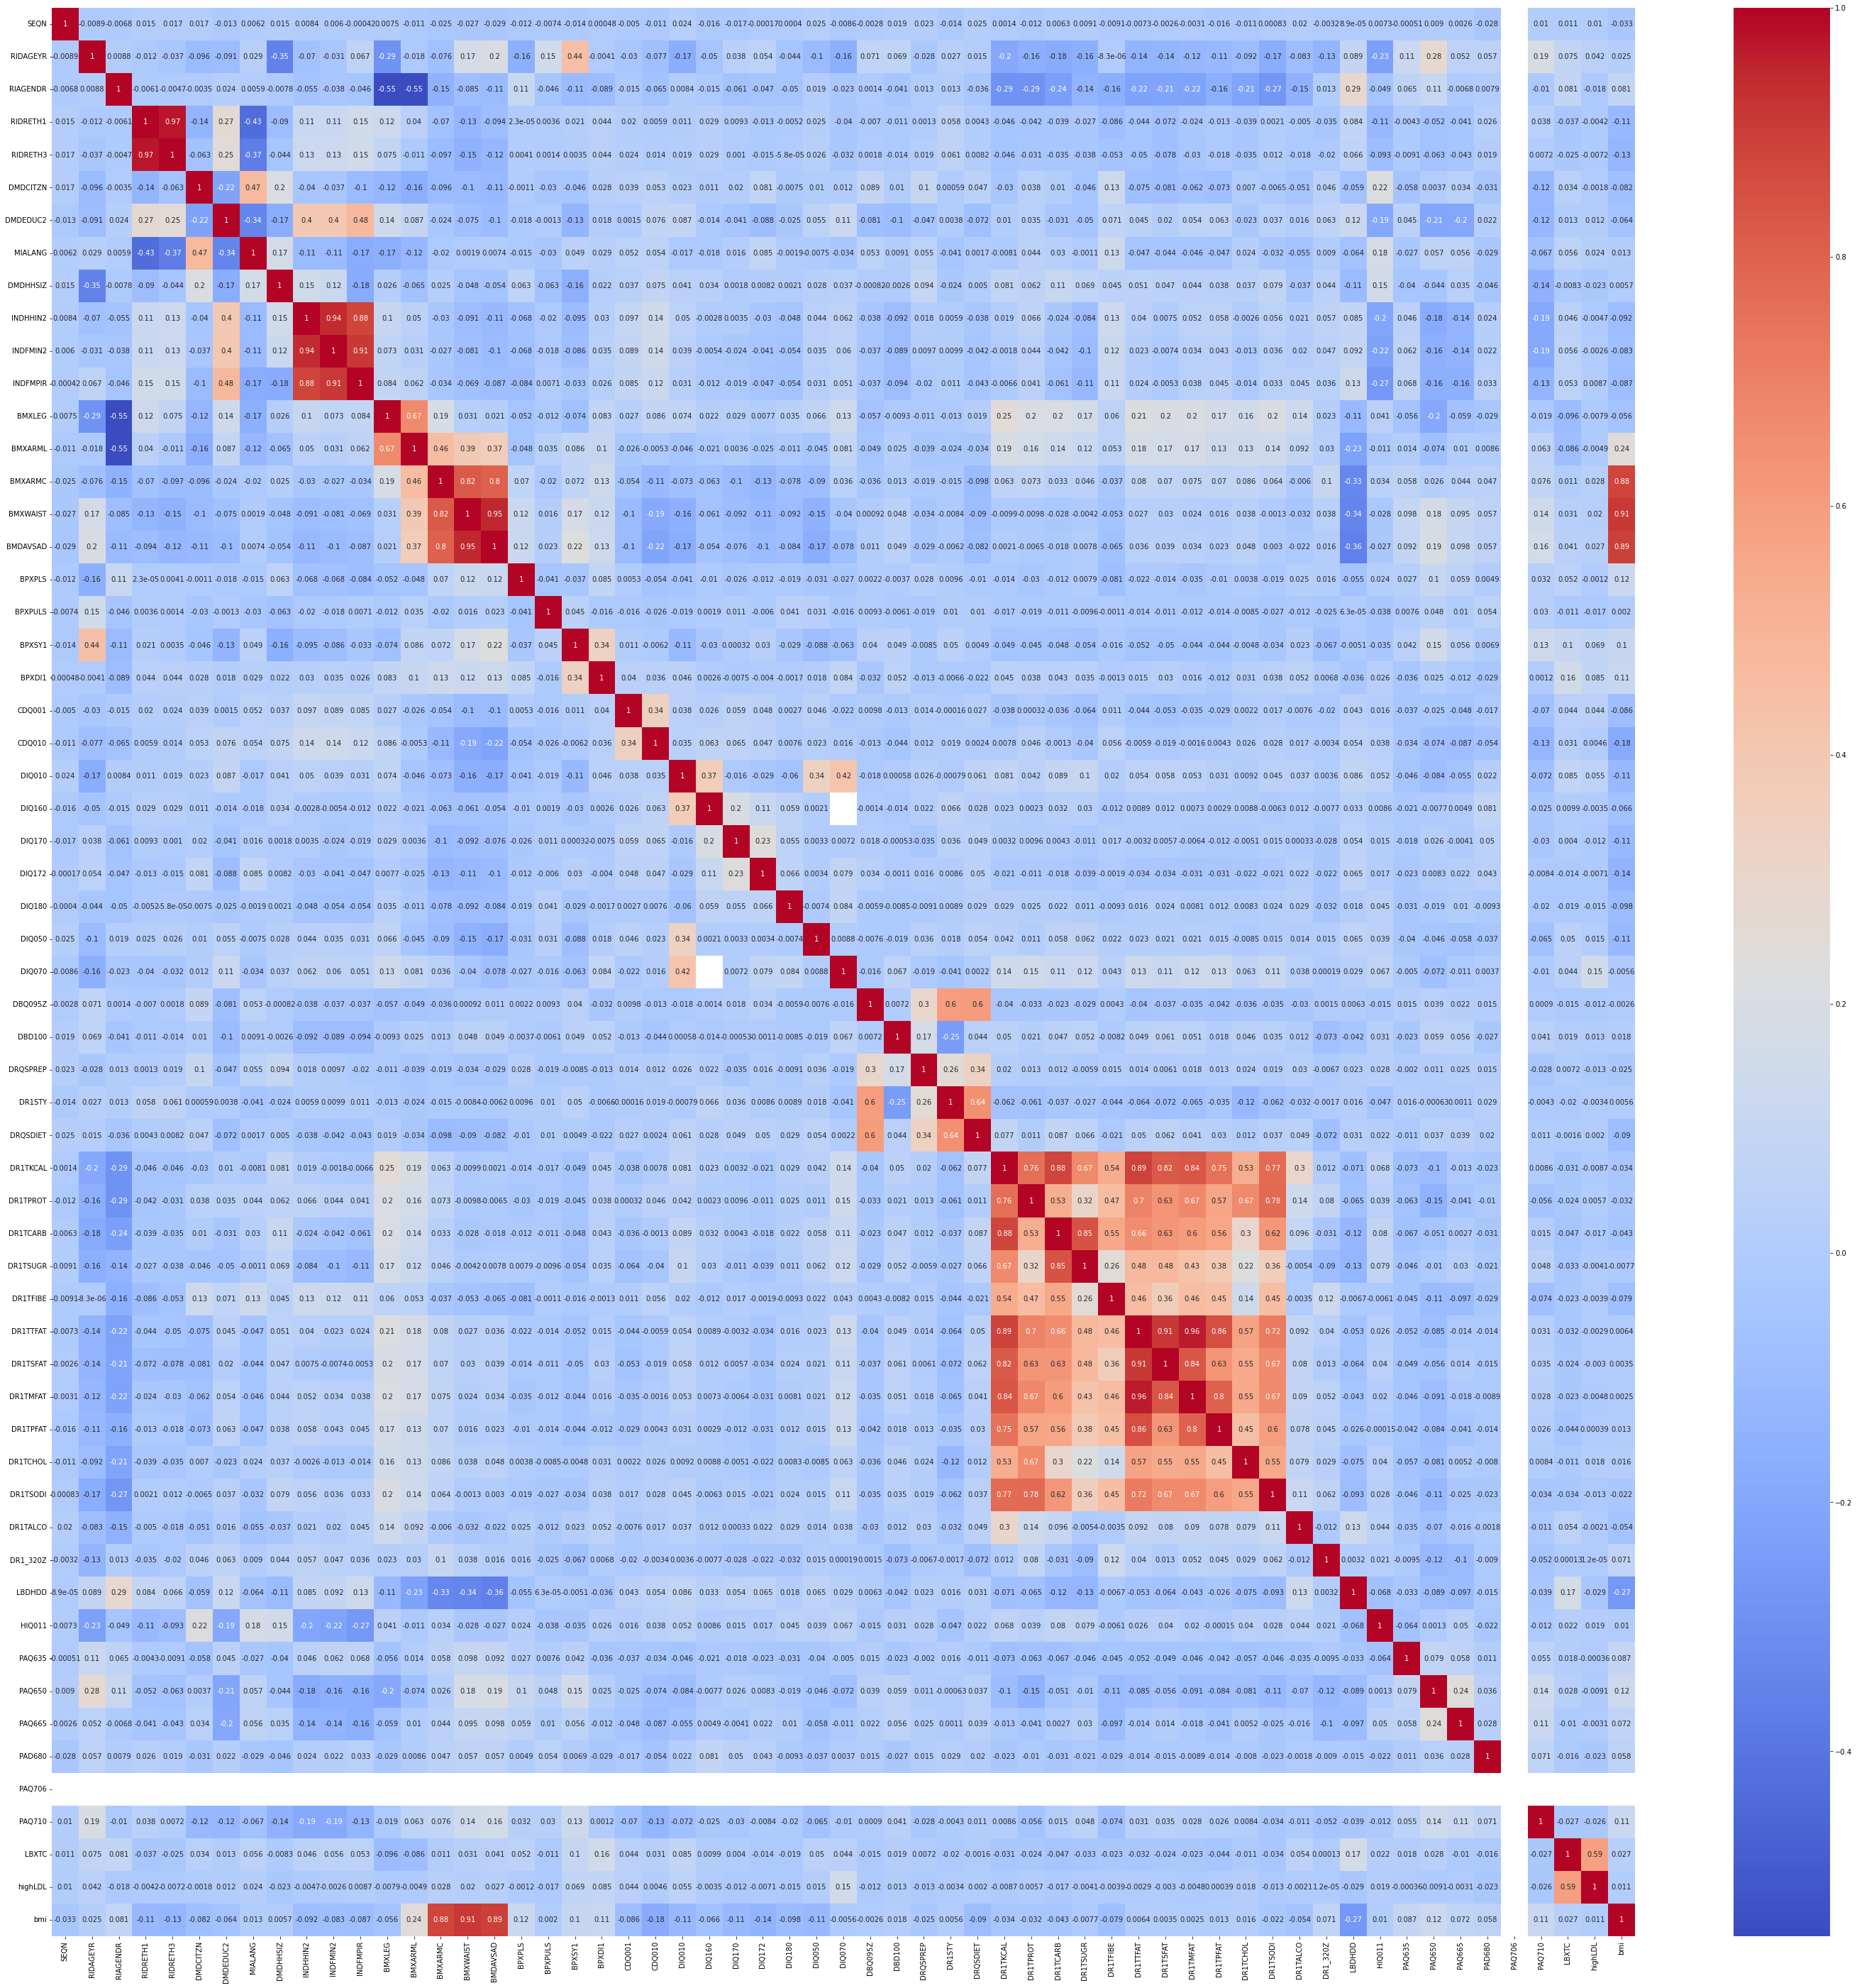

In [4]:
plt.figure(figsize=(50,50))
# correlation_df = df.corr(method='pearson') 
correlation_df = df.corr() 
correlation_df.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2) 
# print(correlation_df.shape) 
# print(correlation_df.head()) 
sns.heatmap(correlation_df,cbar=True,annot=True,cmap='coolwarm') 
# correlation_df.savefig("correlation.png")
# plt.savefig('plots/correlation.png')
# plt.close() 

In [14]:
# for cut in range(0,47,10):
#     plt.figure(figsize=(10,10))

#     correlation_df = df[df.columns[cut:cut+10]].corr() 
# #     print(correlation_df.shape) 
# #     print(correlation_df.head()) 
#     sns.heatmap(correlation_df,cbar=True,annot=True,cmap='Blues') 
    
#     plt.show() 

In [15]:
for col in df.columns: 
    print(col)
    fig, ax = plt.subplots()
    df.hist(col, ax=ax)
    fig.savefig('plots/distributions/'+col+'.png') 
    plt.close() 

SEQN
RIDAGEYR
RIAGENDR
RIDRETH1
RIDRETH3
DMDCITZN
DMDEDUC2
MIALANG
DMDHHSIZ
INDHHIN2
INDFMIN2
INDFMPIR
BMXWT
BMXHT
BMXLEG
BMXARML
BMXARMC
BMXWAIST
BMDAVSAD
BPXPLS
BPXPULS
BPXSY1
BPXDI1
BPXSY2
BPXDI2
CDQ001
CDQ010
DIQ010
DIQ160
DIQ170
DIQ172
DIQ180
DIQ050
DIQ070
DBQ095Z
DBD100
DRQSPREP
DR1STY
DRQSDIET
DR1TKCAL
DR1TPROT
DR1TCARB
DR1TSUGR
DR1TFIBE
DR1TTFAT
DR1TSFAT
DR1TMFAT
DR1TPFAT
DR1TCHOL
DR1TSODI
DR1TALCO
DR1_320Z
LBDHDD
HIQ011
PAQ635
PAQ650
PAQ665
PAD680
PAQ706
PAQ710
LBXTC
LBXTR


In [16]:
# from pandas.plotting import scatter_matrix

# pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


In [17]:
for col1 in df.columns: 
    for col2 in df.columns: 
            if col1 != col2: 
                fig, ax = plt.subplots()
                df.plot.scatter(x=col1, y=col2, c='DarkBlue', ax=ax) 
                fig.savefig('plots/pattern_2d/'+ col1 + '_' + col2 + '.png') 
                plt.close() 

In [ ]:
from matplotlib import cm
for col1 in df.columns: 
    for col2 in df.columns: 
        for col3 in df.columns: 
            if col1 != col2 and col2 != col3 and col1 != col3: 
                fig, ax = plt.subplots()
                df.plot.scatter(x=col1, y=col2, c=col3, cmap=cm.get_cmap('Spectral'), ax=ax) 
                fig.savefig('plots/pattern_3d/'+ col1 + '_' + col2 + '_' + col3 + '.png') 
                plt.close() 

In [ ]:
df.plot.scatter(x='BMXWT', y='BMXHT', c='BMXWAIST') 